In [1]:
import numpy as np
import torch
import timm

from liptrf.models.vit import L2Attention

/home/versag/anaconda3/envs/liptrf/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = timm.create_model('vit_base_patch16_224', pretrained=True)

In [4]:
model

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU()
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop2): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,),

In [81]:
import webdataset as wds
from torchvision import transforms
import os
import tarfile
import io 
from PIL import Image

In [95]:
def identity(x):
    return x

class Byte2Image(object):
    def __call__(self, sample):
        return Image.open(io.BytesIO(sample))

normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225])

preproc = transforms.Compose([
    Byte2Image(),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    normalize,
])

train_dataset = (wds.WebDataset(os.path.join('../data/fall21k/train/train-{00000..00001}.tar'))
            .shuffle(100)
            .decode()
            .to_tuple("x.img.pil y.cls")
            .map_tuple(preproc, identity)
            )

train_loader =  wds.WebLoader(
            train_dataset,
            batch_size=None,
            shuffle=False,
            num_workers=2,
        )

In [88]:
trf = tarfile.open('../data/fall21k/train/train-00000.tar')

In [85]:
f = trf.extractfile('04294200.x.img.pil')

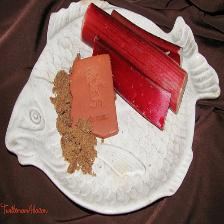

In [86]:
Image.open(io.BytesIO(f.read()))

In [96]:
for x, y in train_dataset:
    print (x.shape)
    break

torch.Size([3, 224, 224])
